In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


In [2]:
def load_data():
  data = pd.read_excel('stemming_label_2.xlsx')
  return data

df = load_data()
df.head()

,isi,label
0,bonus guna metode bayar transaksi sesuai prose...,NEGATIVE
1,suka belanja tokopedia diskon kembali dana bar...,NEGATIVE
2,tokopedia keren gratis ongkos kirim pelit prom...,POSITIVE
3,baru buruk kali buka produk sebentar beranda u...,NEGATIVE
4,mohon sembunyi toko aktif produk habis jual ak...,NEGATIVE


#Vectorize

In [3]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(df['isi'],df['label'],test_size=0.2, random_state=10)

In [4]:
Encoder = LabelEncoder()
train_y = Encoder.fit_transform(train_y)
test_y = Encoder.transform(test_y)

In [5]:
vect = TfidfVectorizer(ngram_range=(2,2))
vect.fit(train_x)

train_x_tfidf = vect.fit_transform(train_x)
test_x_tfidf = vect.transform(test_x)

In [6]:
print("X_train_shape : ",train_x_tfidf.shape)
print("X_test_shape : ",test_x_tfidf.shape)
print("y_train_shape : ",train_y.shape)
print("y_test_shape : ",test_y.shape)

X_train_shape :  (800, 9909)
X_test_shape :  (200, 9909)
y_train_shape :  (800,)
y_test_shape :  (200,)


In [7]:
print("x_train : \n",train_x_tfidf)
print("\n x_test : \n",test_x_tfidf)
print("\n y_train : \n",train_y)
print("\n y_test : \n",test_y)

x_train : 
   (0, 3385)	0.1637547406340982
  (0, 9462)	0.22361058360919525
  (0, 8158)	0.22361058360919525
  (0, 3121)	0.21064476054183645
  (0, 5681)	0.22361058360919525
  (0, 1030)	0.22361058360919525
  (0, 7916)	0.21064476054183645
  (0, 6880)	0.22361058360919525
  (0, 8407)	0.22361058360919525
  (0, 7263)	0.22361058360919525
  (0, 7262)	0.22361058360919525
  (0, 8073)	0.21064476054183645
  (0, 4698)	0.18355016245325945
  (0, 7118)	0.20144536267388025
  (0, 4678)	0.19430975532541683
  (0, 1010)	0.14693151747148522
  (0, 1602)	0.13301106666799112
  (0, 8863)	0.21064476054183645
  (0, 1952)	0.21064476054183645
  (0, 6356)	0.22361058360919525
  (0, 7948)	0.22361058360919525
  (0, 7477)	0.22361058360919525
  (0, 9159)	0.22361058360919525
  (1, 30)	0.1783747329437509
  (1, 5485)	0.1783747329437509
  :	:
  (798, 8597)	0.21668400886875072
  (798, 6996)	0.21668400886875072
  (798, 9780)	0.21668400886875072
  (798, 1701)	0.1882908047849933
  (798, 8962)	0.17786450170173074
  (798, 6525)	0.17

#Multinomial Naive Bayes

In [ ]:
MNB = MultinomialNB()
MNB.fit(train_x_tfidf, train_y)

MultinomialNB()

In [ ]:
scores = cross_val_score(MNB, train_x_tfidf, train_y, cv=10, scoring='accuracy')
print(scores)
print("K-Fold Mean -> ",cross_val_score(MNB, train_x_tfidf, train_y, cv=10).mean())

[0.8625 0.825  0.8    0.7875 0.7875 0.7875 0.8    0.825  0.7875 0.825 ]
K-Fold Mean ->  0.8087499999999999


In [ ]:
MNB_pred = MNB.predict(test_x_tfidf)

In [ ]:
print(confusion_matrix(MNB_pred, test_y))
print("MNB Accuracy Score -> ",accuracy_score(test_y, MNB_pred)*100)
print("MNB Recall Score -> ",recall_score(test_y, MNB_pred)*100)
print("MNB Precision Score -> ",precision_score(test_y, MNB_pred)*100)
print("MNB f1 Score -> ",f1_score(test_y, MNB_pred)*100)

[[92 16]
 [16 76]]
MNB Accuracy Score ->  84.0
MNB Recall Score ->  82.6086956521739
MNB Precision Score ->  82.6086956521739
MNB f1 Score ->  82.6086956521739


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       108
           1       0.83      0.83      0.83        92

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200


Confusion Matrix:


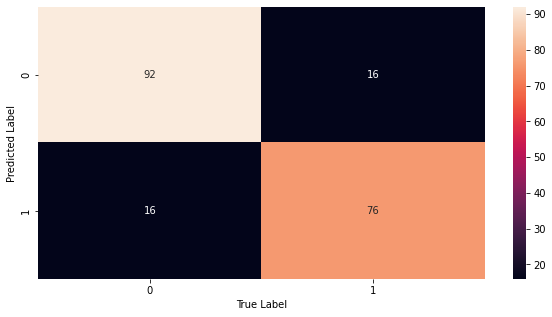



True Positive :  76
True Negative :  92
False Positive :  16
False Negative  :  16


In [ ]:
print("Classification Report:")
print(classification_report(test_y, MNB_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(MNB_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, MNB_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [ ]:
mae = mean_absolute_error(test_y, MNB_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.16


In [ ]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_MNB = pd.DataFrame({'prediksi':MNB_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_MNB = pd.DataFrame(df_result_MNB['prediksi'].value_counts()/df_result_MNB['prediksi'].count()*100)
df_persen_MNB

,prediksi
0,54.00%
1,46.00%


#Bernoulli Naive Bayes

In [ ]:
BNB = BernoulliNB()
BNB.fit(train_x_tfidf, train_y)

BernoulliNB()

In [ ]:
scores = cross_val_score(BNB, train_x_tfidf, train_y, cv=10, scoring='accuracy')
print(scores)
print("K-Fold Mean -> ",cross_val_score(BNB, train_x_tfidf, train_y, cv=10).mean())

[0.75   0.725  0.675  0.6875 0.675  0.7375 0.6875 0.7625 0.675  0.7   ]
K-Fold Mean ->  0.7075


In [ ]:
BNB_pred = BNB.predict(test_x_tfidf)

In [ ]:
print(confusion_matrix(BNB_pred, test_y))
print("BNB Accuracy Score -> ",accuracy_score(test_y, BNB_pred)*100)
print("BNB Recall Score -> ",recall_score(test_y, BNB_pred)*100)
print("BNB Precision Score -> ",precision_score(test_y, BNB_pred)*100)
print("BNB f1 Score -> ",f1_score(test_y, BNB_pred)*100)

[[70  9]
 [38 83]]
BNB Accuracy Score ->  76.5
BNB Recall Score ->  90.21739130434783
BNB Precision Score ->  68.59504132231406
BNB f1 Score ->  77.9342723004695


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.65      0.75       108
           1       0.69      0.90      0.78        92

    accuracy                           0.77       200
   macro avg       0.79      0.78      0.76       200
weighted avg       0.79      0.77      0.76       200


Confusion Matrix:


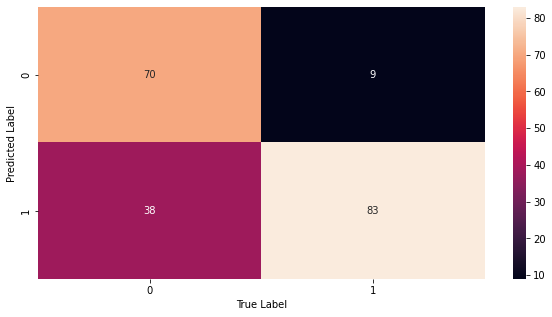



True Positive :  83
True Negative :  70
False Positive :  38
False Negative  :  9


In [ ]:
print("Classification Report:")
print(classification_report(test_y, BNB_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(BNB_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, BNB_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [ ]:
mae = mean_absolute_error(test_y, BNB_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.235


In [ ]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_BNB = pd.DataFrame({'prediksi':BNB_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_BNB = pd.DataFrame(df_result_BNB['prediksi'].value_counts()/df_result_BNB['prediksi'].count()*100)
df_persen_BNB

,prediksi
1,60.50%
0,39.50%


#Hitung nilai C

In [8]:
for c in [0.01, 0.05, 0.25, 0.5, 1, 1.01, 1.05, 1.25, 1.5, 2, 2.01, 2.05, 2.25, 2.5, 3]: # Menghitung nilai C
	sv = SVC(C=c)
	sv.fit(train_x_tfidf, train_y)
	print('Accuracy fot C=%s: %s'
	%(c,accuracy_score(test_y, sv.predict(test_x_tfidf)))) 

Accuracy fot C=0.01: 0.54
Accuracy fot C=0.05: 0.54
Accuracy fot C=0.25: 0.54
Accuracy fot C=0.5: 0.63
Accuracy fot C=1: 0.79
Accuracy fot C=1.01: 0.79
Accuracy fot C=1.05: 0.805
Accuracy fot C=1.25: 0.82
Accuracy fot C=1.5: 0.825
Accuracy fot C=2: 0.82
Accuracy fot C=2.01: 0.82
Accuracy fot C=2.05: 0.82
Accuracy fot C=2.25: 0.82
Accuracy fot C=2.5: 0.82
Accuracy fot C=3: 0.82


# Linear

In [ ]:
linear = SVC(kernel='linear', C=2)
linear.fit(train_x_tfidf, train_y)

SVC(C=2, kernel='linear')

In [ ]:
scores = cross_val_score(linear, train_x_tfidf, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(linear,train_x_tfidf, train_y, cv=10).mean())

[0.8625 0.8625 0.7875 0.775  0.7    0.7625 0.8375 0.7625 0.75   0.8125]
K-Fold Mean ->  0.79125


In [ ]:
linear_pred = linear.predict(test_x_tfidf)

In [ ]:
print(confusion_matrix(linear_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, linear_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, linear_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, linear_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, linear_pred)*100)

[[88 15]
 [20 77]]
SVM Accuracy Score ->  82.5
SVM Recall Score ->  83.69565217391305
SVM Precision Score ->  79.38144329896907
SVM f1 Score ->  81.48148148148148


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       108
           1       0.79      0.84      0.81        92

    accuracy                           0.82       200
   macro avg       0.82      0.83      0.82       200
weighted avg       0.83      0.82      0.83       200


Confusion Matrix:


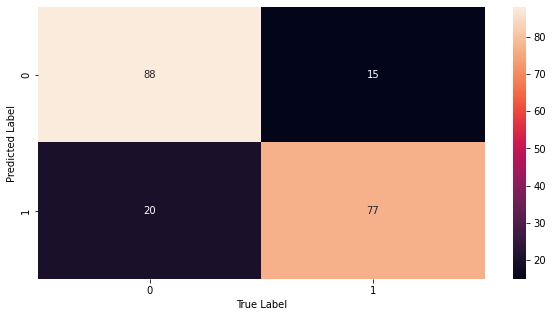



True Positive :  77
True Negative :  88
False Positive :  20
False Negative  :  15


In [ ]:
print("Classification Report:")
print(classification_report(test_y, linear_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(linear_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, linear_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [ ]:
mae = mean_absolute_error(test_y, linear_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.175


In [ ]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_linear = pd.DataFrame({'prediksi':linear_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_linear = pd.DataFrame(df_result_linear['prediksi'].value_counts()/df_result_linear['prediksi'].count()*100)
df_persen_linear

,prediksi
0,51.50%
1,48.50%


# Polynomial 

In [ ]:
poly = SVC(kernel='poly', C=2)
poly.fit(train_x_tfidf, train_y)

SVC(C=2, kernel='poly')

In [ ]:
scores = cross_val_score(poly, train_x_tfidf, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(poly,train_x_tfidf, train_y, cv=10).mean())

[0.575  0.5375 0.55   0.55   0.5375 0.55   0.55   0.55   0.525  0.5125]
K-Fold Mean ->  0.5437500000000001


In [ ]:
poly_pred = poly.predict(test_x_tfidf)

In [ ]:
print(confusion_matrix(poly_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, poly_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, poly_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, poly_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, poly_pred)*100)

[[108  66]
 [  0  26]]
SVM Accuracy Score ->  67.0
SVM Recall Score ->  28.26086956521739
SVM Precision Score ->  100.0
SVM f1 Score ->  44.06779661016949


Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       108
           1       1.00      0.28      0.44        92

    accuracy                           0.67       200
   macro avg       0.81      0.64      0.60       200
weighted avg       0.80      0.67      0.62       200


Confusion Matrix:


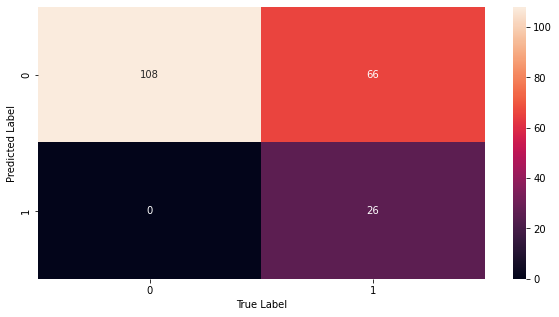



True Positive :  26
True Negative :  108
False Positive :  0
False Negative  :  66


In [ ]:
print("Classification Report:")
print(classification_report(test_y, poly_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(poly_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, poly_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [ ]:
mae = mean_absolute_error(test_y, poly_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.33


In [ ]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_poly = pd.DataFrame({'prediksi':poly_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_poly = pd.DataFrame(df_result_poly['prediksi'].value_counts()/df_result_poly['prediksi'].count()*100)
df_persen_poly

,prediksi
0,87.00%
1,13.00%


# Radial Basis Function

In [9]:
rbf = SVC(kernel='rbf', C=2, gamma=0.50 )
rbf.fit(train_x_tfidf, train_y)

SVC(C=2, gamma=0.5)

In [10]:
scores = cross_val_score(rbf, train_x_tfidf, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(rbf,train_x_tfidf, train_y, cv=10).mean())

[0.9    0.825  0.7875 0.8125 0.7125 0.7625 0.825  0.725  0.725  0.8125]
K-Fold Mean ->  0.78875


In [11]:
rbf_pred = rbf.predict(test_x_tfidf)

In [12]:
print(confusion_matrix(rbf_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, rbf_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, rbf_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, rbf_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, rbf_pred)*100)

[[92 16]
 [16 76]]
SVM Accuracy Score ->  84.0
SVM Recall Score ->  82.6086956521739
SVM Precision Score ->  82.6086956521739
SVM f1 Score ->  82.6086956521739


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       108
           1       0.83      0.83      0.83        92

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200


Confusion Matrix:


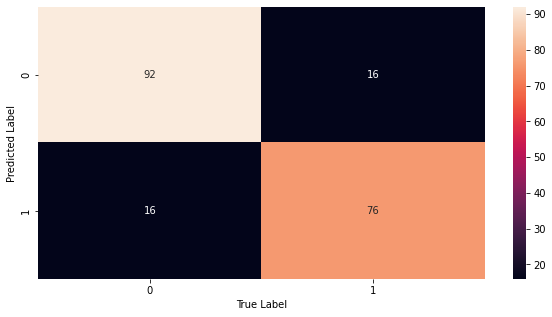



True Positive :  76
True Negative :  92
False Positive :  16
False Negative  :  16


In [13]:
print("Classification Report:")
print(classification_report(test_y, rbf_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(rbf_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, rbf_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)



In [14]:
mae = mean_absolute_error(test_y, rbf_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.16


In [15]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_rbf = pd.DataFrame({'prediksi':rbf_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_RBF = pd.DataFrame(df_result_rbf['prediksi'].value_counts()/df_result_rbf['prediksi'].count()*100)
df_persen_RBF

,prediksi
0,54.00%
1,46.00%


# Sigmoid

In [ ]:
sig = SVC(kernel='sigmoid', C=2)
sig.fit(train_x_tfidf, train_y)

SVC(C=2, kernel='sigmoid')

In [ ]:
scores = cross_val_score(sig, train_x_tfidf, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(sig,train_x_tfidf, train_y, cv=10).mean())

[0.8625 0.8625 0.7875 0.775  0.725  0.7625 0.8375 0.7875 0.75   0.8125]
K-Fold Mean ->  0.79625


In [ ]:
sig_pred = sig.predict(test_x_tfidf)

In [ ]:
print(confusion_matrix(sig_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, sig_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, sig_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, sig_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, sig_pred)*100)

[[89 15]
 [19 77]]
SVM Accuracy Score ->  83.0
SVM Recall Score ->  83.69565217391305
SVM Precision Score ->  80.20833333333334
SVM f1 Score ->  81.91489361702128


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       108
           1       0.80      0.84      0.82        92

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200


Confusion Matrix:


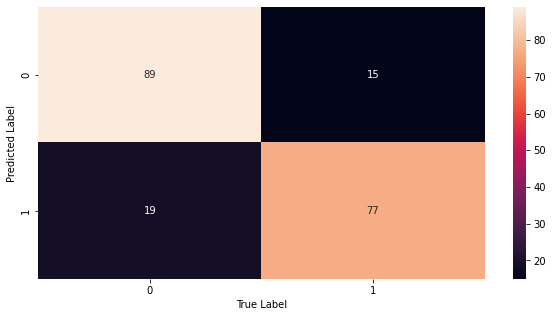



True Positive :  77
True Negative :  89
False Positive :  19
False Negative  :  15


In [ ]:
print("Classification Report:")
print(classification_report(test_y, sig_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(sig_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, sig_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [ ]:
mae = mean_absolute_error(test_y, sig_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.17


In [ ]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_sig = pd.DataFrame({'prediksi':sig_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_sig = pd.DataFrame(df_result_sig['prediksi'].value_counts()/df_result_sig['prediksi'].count()*100)
df_persen_sig

,prediksi
0,52.00%
1,48.00%
